In [4]:
import pyomo.environ as pyo
from idaes.core import FlowsheetBlock
from idaes.models.unit_models import Heater
from idaes.models.properties.general_helmholtz import (
    HelmholtzParameterBlock,
    PhaseType,
    StateVars,
)
from idaes.core.util.model_statistics import degrees_of_freedom
from surrogate_heater import SurrogateHeater
from data import temperature, pressure, power, indexes


m = pyo.ConcreteModel()
m.fs = FlowsheetBlock(dynamic=False)
m.fs.properties = HelmholtzParameterBlock(
    pure_component="h2o",
    phase_presentation=PhaseType.MIX,
    state_vars=StateVars.TPX,
)
m.fs.heater = SurrogateHeater(property_package=m.fs.properties)

outlet_temperatures = []

for i in indexes:
    m.fs.heater.inlet.flow_mol[0].fix(100)
    m.fs.heater.inlet.temperature[0].fix(temperature[i])
    m.fs.heater.inlet.vapor_frac[0].fix(1)
    m.fs.heater.inlet.pressure[0].fix(pressure[i])
    m.fs.heater.heat_duty.fix(power[i])
    solver = pyo.SolverFactory("ipopt")
    solver.solve(m)
    
    outlet_temperatures.append(m.fs.heater.outlet.temperature[0].value)

print(degrees_of_freedom(m))

print(m.fs.heater.outlet.temperature[0].value)
print(m.fs.heater.outlet.pressure[0].value)
print(m.fs.heater.outlet.vapor_frac[0].value)
print(m.fs.heater.inlet.vapor_frac[0].value)

2024-09-26 08:24:22 [INFO] idaes.core.surrogate.pysmo_surrogate: Decode surrogate. type=rbf

Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  gaussian
Regularization done:  True

Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  gaussian
Regularization done:  True

Default parameter estimation method is used.

Parameter estimation method:  algebraic
Basis function:  gaussian
Regularization done:  True
model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally infeasible
      point. Problem may be infeasible.
model.name="unknown";
    - termination condition: infeasible
    - message from solver: Ipopt 3.13.2\x3a Converged to a locally

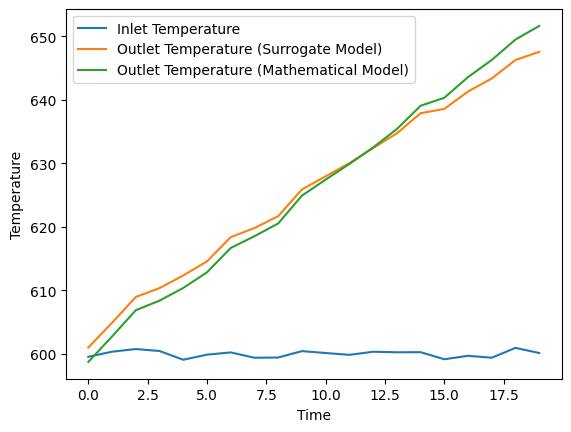

In [5]:
import matplotlib.pyplot as plt
plt.plot(indexes, temperature, label="Inlet Temperature")

plt.plot(indexes, outlet_temperatures, label="Outlet Temperature (Surrogate Model)")

from live_ss import indexes, outlet_temperatures, temperature
plt.plot(outlet_temperatures, label="Outlet Temperature (Mathematical Model)")

plt.xlabel("Time")
plt.ylabel("Temperature")

plt.legend()